# Search Query Visualization with WordClouds

In [1]:
'''
function that creates a wordcloud given word frequencies and saves it as a .png
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def generate_wordcloud(word_freq):
    # generate wordcloud
    word_cloud = WordCloud(stopwords=stopwords.words('english')).generate_from_frequencies(word_freq)

    # plot wordcloud 
    plt.figure(figsize = (15, 10))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()
    
    word_cloud.to_file('data//output//web_analytics.png')

In [2]:
# data science essentials
import pandas as pd
import xlrd
import numpy as np

# regex module
import re

In [3]:
# load in separate excel spreadsheets as dataframes
filename1 = 'Analytics All Web Site Data Pages 20180201-20180228(1)'
df1 = pd.read_excel('data//' + filename1 + '.xlsx', sheet_name='Dataset1')

filename2 = 'Analytics All Web Site Data Pages 20180201-20180228(2)'
df2 = pd.read_excel('data//' + filename2 + '.xlsx', sheet_name='Dataset1')

filename3 = 'Analytics All Web Site Data Pages 20180201-20180228(3)'
df3 = pd.read_excel('data//' + filename3 + '.xlsx', sheet_name='Dataset1')

filename4 = 'Analytics All Web Site Data Pages 20180201-20180228'
df4 = pd.read_excel('data//' + filename4 + '.xlsx', sheet_name='Dataset1')

In [4]:
# drop the last row of each dataframe (this row only contains summary stats)
df1 = df1.drop(df1.index[len(df1)-1])
df2 = df2.drop(df2.index[len(df2)-1])
df3 = df3.drop(df3.index[len(df3)-1])
df4 = df4.drop(df4.index[len(df4)-1])

# glue dataframes together and reset the indexes
frames = [df1, df2, df3, df4]
df = pd.concat(frames).reset_index()

# some pre-processing magic
df['Page'] = df['Page'].str.replace('+', ' ') 
df['Page'] = df['Page'].str.replace('[^\w\s]','') 
df['Page'] = df['Page'].str.replace('\\s+',' ') 
df['Query'] = df['Page'].str.extract(r'UTF8q(.*)', expand = True) 
df['Query'] = df['Query'].str.strip() 
df['Query'] = df['Query'].str.lower()
df.dropna(inplace=True) 
df = df.reset_index()
# df['Query'].value_counts()

In [5]:
# group words/phrases with regex (probably not the most elegant way of doing it)
for i in range(len(df)):
    if(not type(df['Query'][i]) == float):
        if(bool(re.search(r'(?:blue[\s]+line|blueline)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'blueline'
        if(bool(re.search(r'(?:exercise[\s]+science|exerci|excer|exs)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'exercise science'
        if(bool(re.search(r'(?:pre[\s]+med|premed)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'premed'
        if(bool(re.search(r'(?:executive[\s]+vice president|executivevicepresident|executive vp)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'executive vice president'
        if(bool(re.search(r'(?:do[\s]+it|doit)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'doit'
        if(bool(re.search(r'(?:reinert|reinart|rienert)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'reinert'
        if(bool(re.search(r'(?:deans[\s]+list|deanslist)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'deans list'
        if(bool(re.search(r'(?:my[\s]+hr|myhr|mhy hr)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'myhr'
        if(bool(re.search(r'(?:jay[\s]+ride|jayride)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'jayride'
        if(bool(re.search(r'(?:graduation[\s]+rate|grad rate|grad rates|graduation rates)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'graduation rate'
        if(bool(re.search(r'(?:cu[\s]+buyplus|buyplus)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'cu buyplus'
        if(bool(re.search(r'(?:ignation|ignatian)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'ignatian'
        if(bool(re.search(r'(?:the[\s]+nest|nest)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'nest'    
        if(bool(re.search(r'(?:opus|opis|opuis)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'opus'        
        if(bool(re.search(r'(?:occupational[\s]+therapy|occupational therap)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'occupational therapy'
        if(bool(re.search(r'(?:nursing)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'nursing'
        if(bool(re.search(r'(?:online minist)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'online ministries'
        if(bool(re.search(r'(?:onlinedeg)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'online degrees'
        if(bool(re.search('excused abs', df['Query'][i]))):
            df.loc[i, 'Query'] = 'excused absences'
        if(bool(re.search(r'(?:out[\s]+look|outlook)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'outlook'
        if(bool(re.search(r'(?:email)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'email'
        if(bool(re.search(r'(?:office[\s]+36|office36)', df['Query'][i]))):
            df.loc[i, 'Query'] = 'office 365'

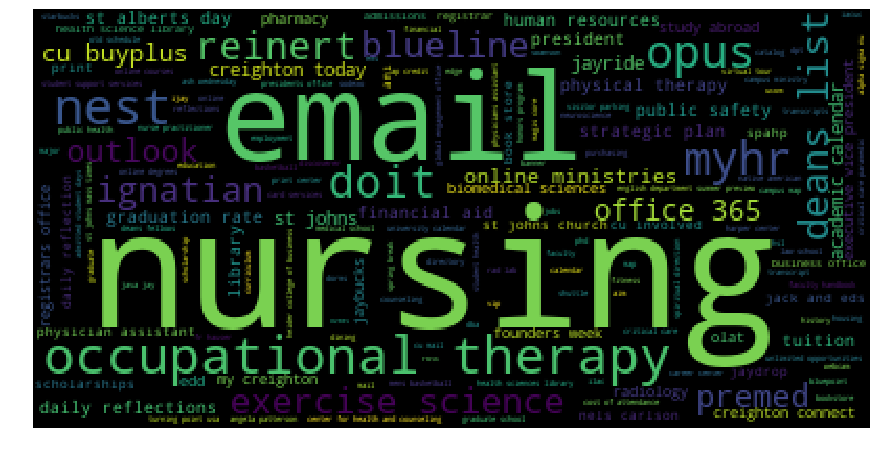

In [6]:
# generate the wordcloud using df value counts
generate_wordcloud(df['Query'].value_counts())